# Deep Hedging AI
### Removing the drift in case an option is traded with a different implied than realized
Hans Buehler, June 30 2022


Tensorflow version 2.7.0
Deep Hedging AI says hello ... 

## Statistical Arbitrage: BS world with option traded, ivol 0.15 rvol 0.2

Deep Hedging Engine: first of 400 epochs for 10000 samples (1000 validation samples) started. Compiling graph ...       


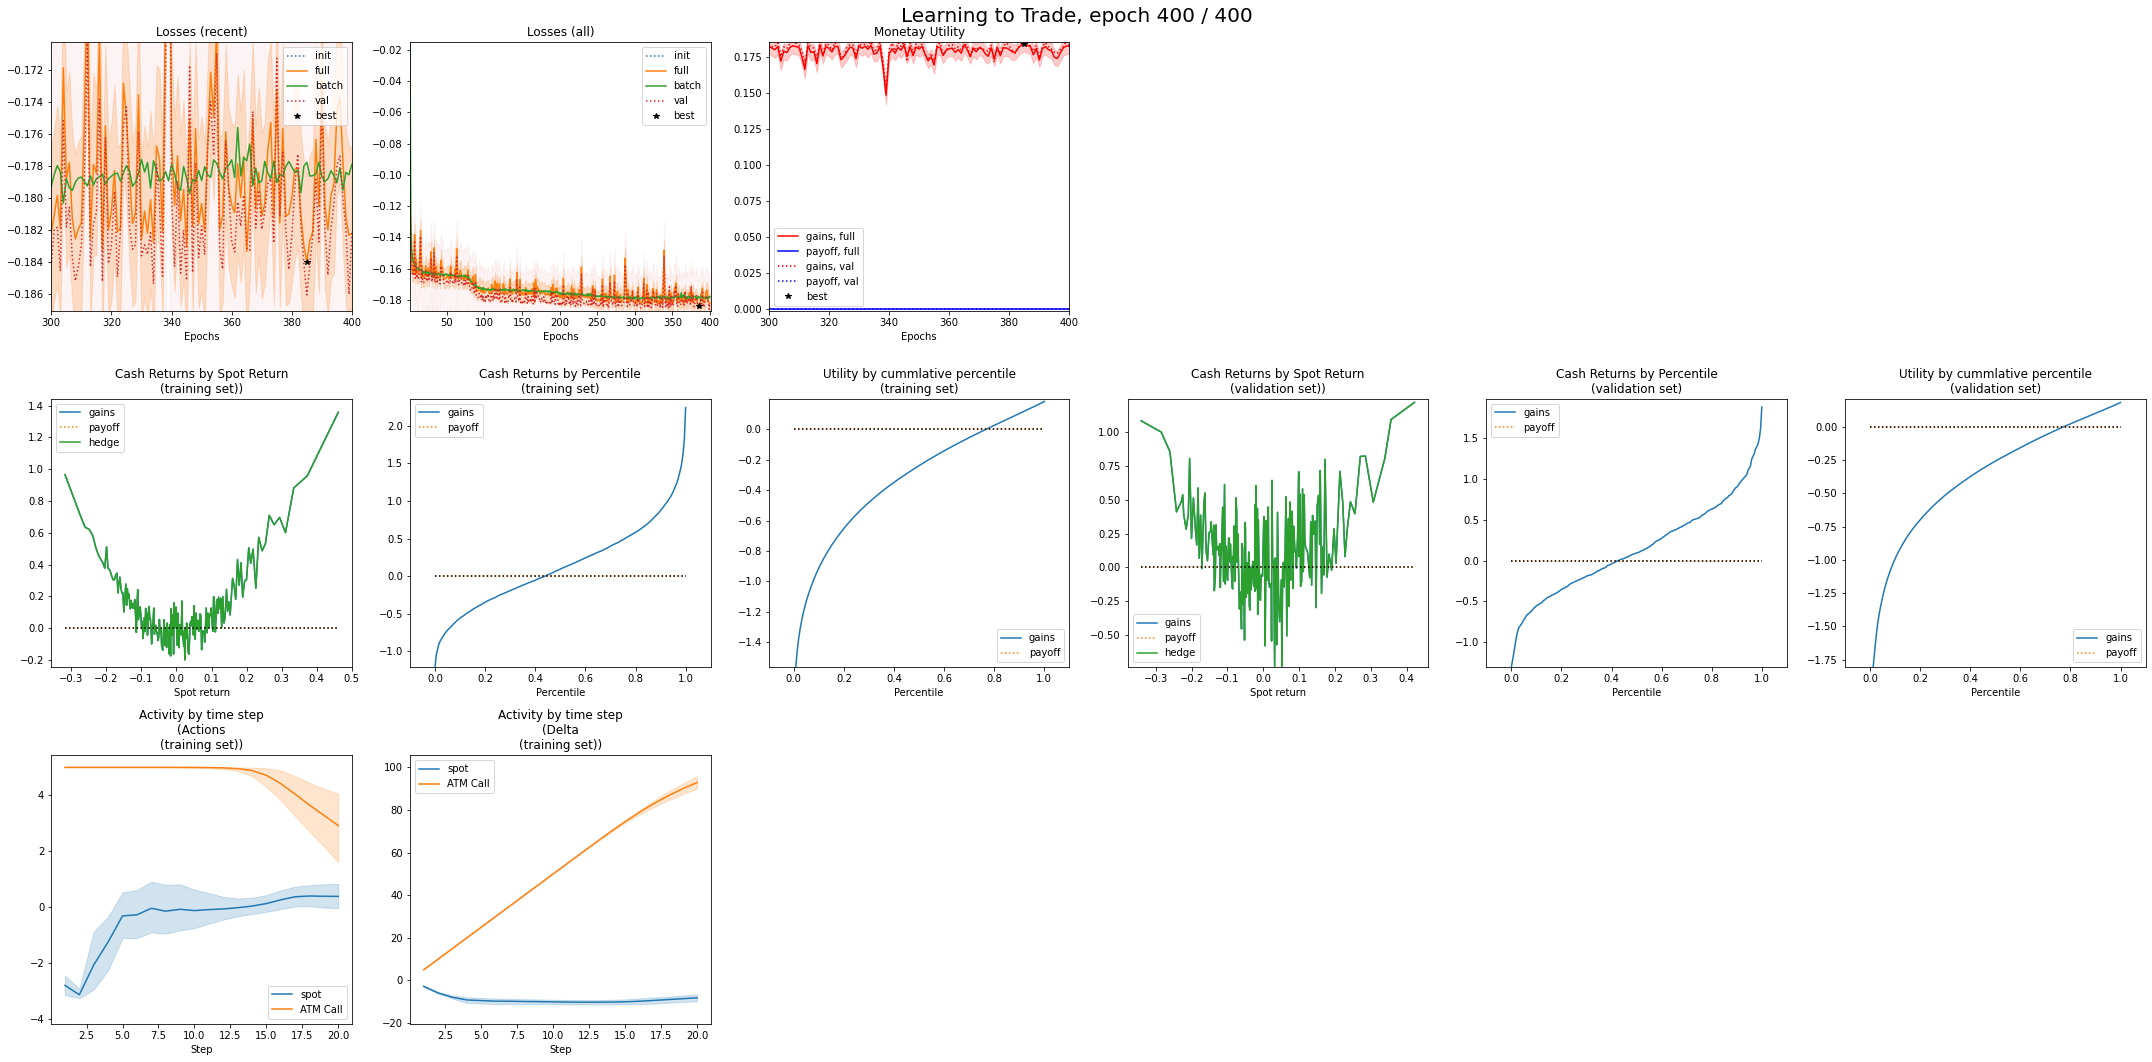

Training 400/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 0.897712 (0.0250973), full -0.182239 (0.00538878), best -0.184007 (0.0250973), batch -0.177885, val -0.182123 (0.0180819). Best batch 384 | time elapsed 49:29; estimated time remaining 7s                            
 Status: Ran all 400 epochs

Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 'pnl', 'cost', 'actions', 'deltas'])
Config usage report
config.gym.agent.network['activation'] = softplus # Network activation function; default: relu
config.gym.agent.network['depth'] = 3 # Network depth; default: 3
config.gym.agent.network['width'] = 20 # Network width; default: 20
config.gym.agent['agent_type'] = feed_forward #  Default: feed_forward
config.gym.agent['features'] = ['price', 'delta', 'time_left'] # Named features the agent uses from the environment; default: ['price', 'delta', 'time_left']
config.gym.environment['softclip_hinge_s

In [3]:
"""
When working on the code base, activate below code:
"""
import imp
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)

print("Deep Hedging AI says hello ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown

# see print of the config below for numerous options
config = Config()
# world
# We create a black scholes world with positive drift
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = False
config.world.payoff = None
config.world.no_stoch_drift = False # no mean-reverting drift
config.world.no_stoch_vol   = True # no stochastic vol
config.world.drift = 0.0
# implied is lower than realized --> should sell the option
config.world.ivol = 0.15    
config.world.rvol = 0.2
# gym
config.gym.objective.utility = "exp2"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Statistical Arbitrage: BS world with option traded, ivol %g rvol %g" % (config.world["ivol"], config.world["rvol"])))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()


## Statistical Arbitrage: Stochastic world with option traded, ivol 0.15 rvol 0.2, drift 0.2

Deep Hedging Engine: first of 400 epochs for 10000 samples (1000 validation samples) started. Compiling graph ...       


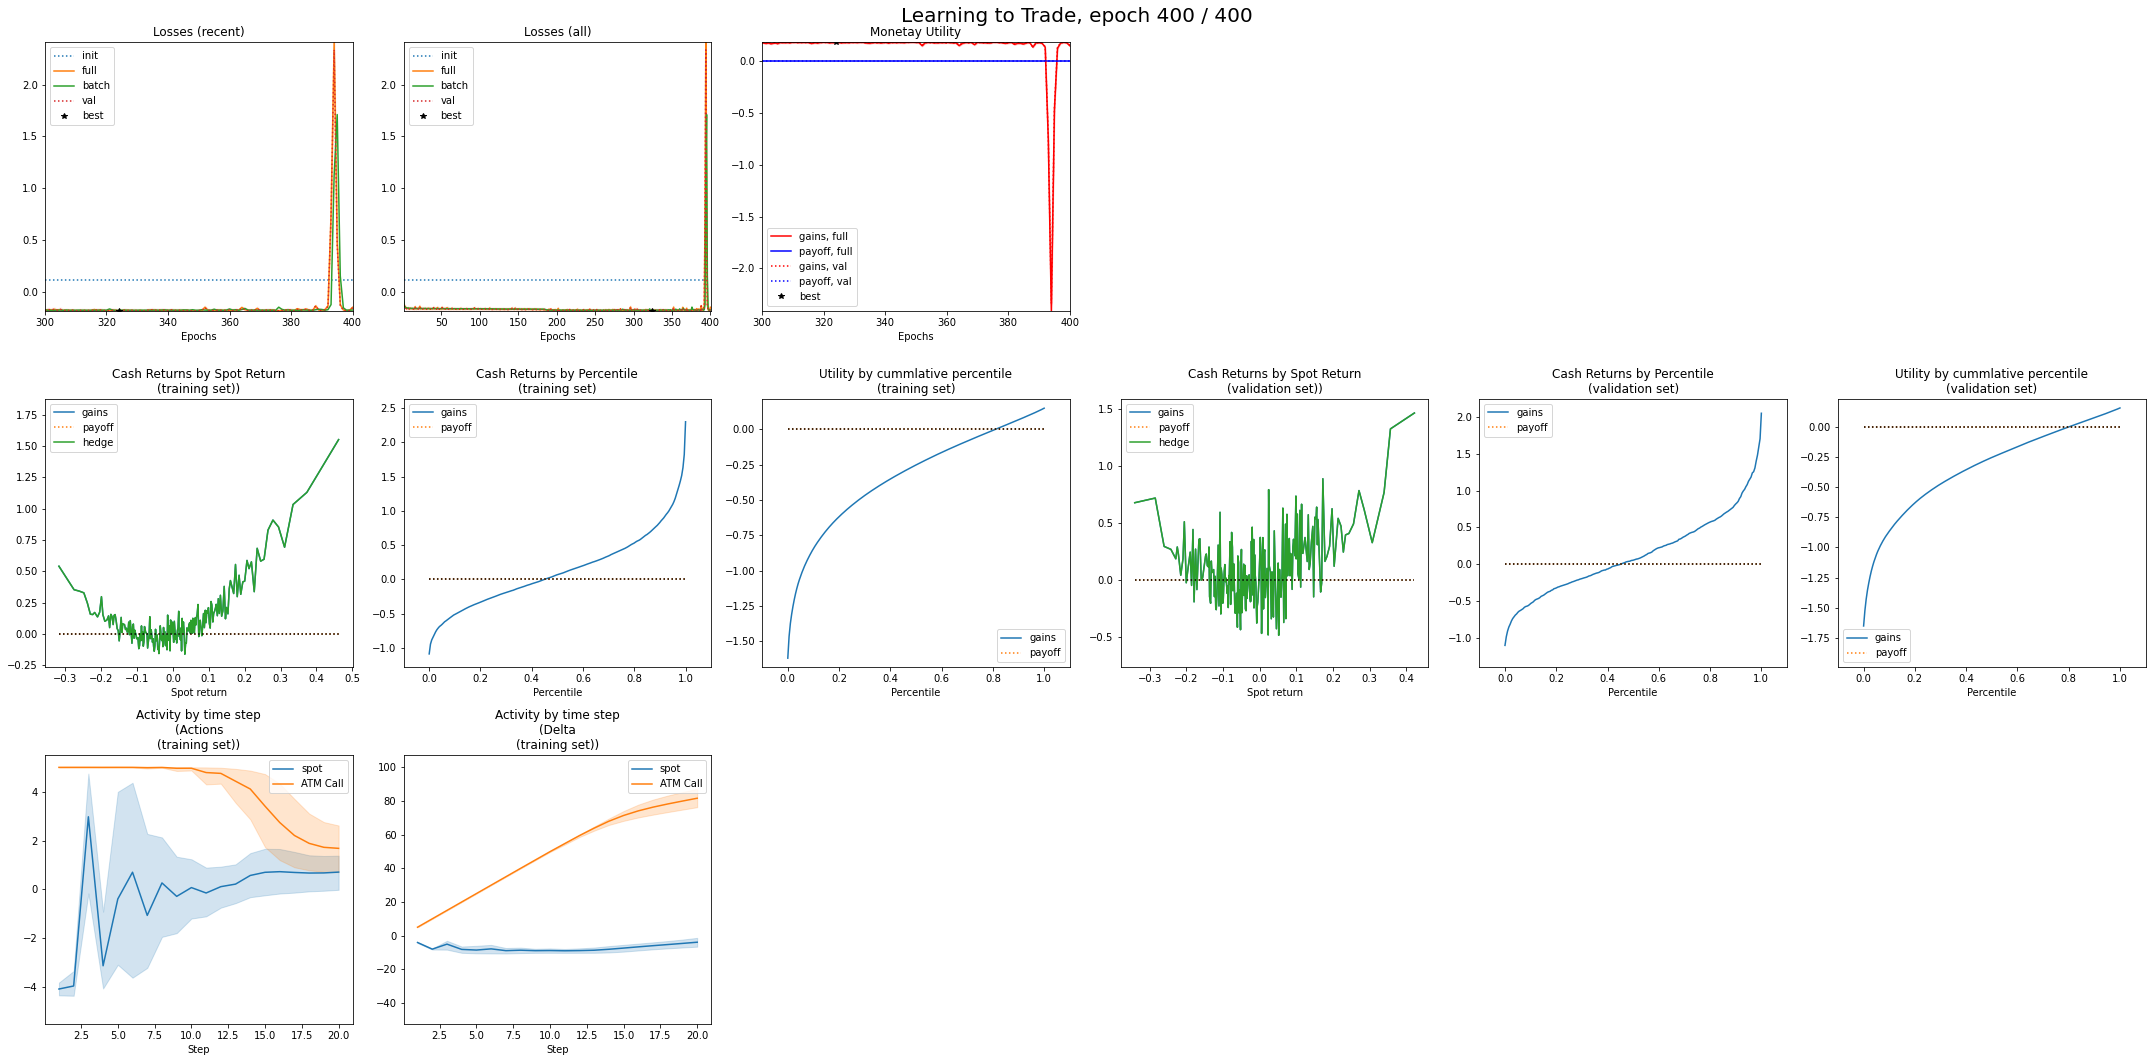

Training 400/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 0.109101 (0.00365125), full -0.15093 (0.00509087), best -0.183473 (0.00365125), batch -0.177405, val -0.155232 (0.0163811). Best batch 323 | time elapsed 50:49; estimated time remaining 7s                             
 Status: Ran all 400 epochs

Keys of the dictionary returned by the gym:  odict_keys(['loss', 'utility', 'utility0', 'gains', 'payoff', 'pnl', 'cost', 'actions', 'deltas'])
Config usage report
config.gym.agent.network['activation'] = softplus # Network activation function; default: relu
config.gym.agent.network['depth'] = 3 # Network depth; default: 3
config.gym.agent.network['width'] = 20 # Network width; default: 20
config.gym.agent['agent_type'] = feed_forward #  Default: feed_forward
config.gym.agent['features'] = ['price', 'delta', 'time_left'] # Named features the agent uses from the environment; default: ['price', 'delta', 'time_left']
config.gym.environment['softclip_hinge

In [4]:

# see print of the config below for numerous options
config = Config()
# world
# We create a world with option traded at 
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = False
config.world.no_stoch_drift = False # no mean-reverting drift
config.world.no_stoch_vol   = True # no stochastic vol
config.world.drift = 0.2
config.world.ivol = 0.15
config.world.rvol = 0.2

config.world.payoff = None  # nothing to hedge
config.world.strike = 1.0   # ATM strike
config.world.ttm_steps = 4  # time to maturity in time steps

# gym
config.gym.objective.utility = "exp2"
config.gym.objective.lmbda = 1.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Statistical Arbitrage: Stochastic world with option traded, ivol %g rvol %g, drift %g" % (config.world["ivol"], config.world["rvol"], config.world["drift"])))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()
